In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Read Zillow Data - full dataset

df = pd.read_csv("../Resources/ZILLOW_DATA.csv")

In [3]:
# Read Regions dataset

dfRegions = pd.read_csv("../Resources/ZILLOW_REGIONS.csv")


In [4]:
dfIndicators = pd.read_csv("../Resources/ZILLOW_INDICATORS.csv")

In [5]:

print("\nThere are no missing regions:\n",dfRegions.info())
print("\nHere's the count of unique region columns:\n",dfRegions.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89305 entries, 0 to 89304
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   region_id    89305 non-null  int64 
 1   region_type  89305 non-null  object
 2   region       89305 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB

There are no missing regions:
 None

Here's the count of unique region columns:
 region_id      89305
region_type        6
region         89295
dtype: int64


In [6]:

print("Here are the top 5 rows of the dataframe:\n",df.head())
print("\nHere are the columns with missing data:\n",df.info())
print("\nHere's the count of unique values in the dataset:\n",df.nunique())

Here are the top 5 rows of the dataframe:
   indicator_id  region_id        date     value
0         ZATT       3101  1998-01-31  338849.0
1         ZATT       3101  1998-02-28  342993.0
2         ZATT       3101  1998-03-31  346763.0
3         ZATT       3101  1998-04-30  349356.0
4         ZATT       3101  1998-05-31  351981.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151555917 entries, 0 to 151555916
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   indicator_id  object 
 1   region_id     int64  
 2   date          object 
 3   value         float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.5+ GB

Here are the columns with missing data:
 None

Here's the count of unique values in the dataset:
 indicator_id          56
region_id          89305
date                1129
value           82293706
dtype: int64


In [7]:
print("There are no null values:\n",df.isnull().sum())
print("\nHere are the row and column counts for the data:",df.shape)

There are no null values:
 indicator_id    0
region_id       0
date            0
value           0
dtype: int64

Here are the row and column counts for the data: (151555917, 4)


In [8]:
print(df['date'].min())
print(df['date'].max())

1996-01-31
2023-11-04


In [9]:
# Filter on Indicator ID ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values

df = df.loc[df['indicator_id'] == 'ZALL', :]

In [10]:
print(len(df.index))

22037189


In [11]:
dfRegions.head()

,region_id,region_type,region
0,394401,metro,"Boone, IA; IA"
1,274772,neigh,Northeast Dallas; TX; Dallas-Fort Worth-Arling...
2,273698,neigh,"Far North; TX; Dallas-Fort Worth-Arlington, TX..."
3,275473,neigh,Southeast Dallas; TX; Dallas-Fort Worth-Arling...
4,9,state,California


In [12]:
# Filter Regions dataframe for region_type = 'zip'

dfRegions=dfRegions.loc[dfRegions['region_type']=='zip',:]

# Create 'zip' column by spliting 'region' column and extracting zip
dfRegions['zip']=dfRegions['region'].str.split(';',n=1,expand=True)[0]

dfRegions.head(25)

,region_id,region_type,region,zip
9,58011,zip,00612; MI; Crawford County; Frederic,00612
13,58051,zip,00693; PA; Pittsburgh; Westmoreland County; Gr...,00693
17,58109,zip,00795; AL; Auburn-Opelika; Lee County; Juana Diaz,00795
23,58129,zip,00907; AR; Forrest City; Saint Francis County;...,00907
91,92526,zip,"78584; TX; Rio Grande City-Roma, TX; Starr County",78584
265,58004,zip,00602; AL; Auburn-Opelika; Lee County; Auburn,00602
269,62298,zip,"11951; NY; New York-Newark-Jersey City, NY-NJ-...",11951
455,94610,zip,84627; UT; Sanpete County; Ephraim,84627
534,89510,zip,"72370; AR; Blytheville, AR; Mississippi County...",72370
628,83982,zip,59255; MT; Roosevelt County; Poplar,59255


In [13]:
# Create 'state' column by spliting 'region' column and extracting stage
dfRegions['state']=dfRegions['region'].str.split(';',n=1,expand=True)[1].str.split(';',n=1,expand=True)[0].str.strip(' ')
dfRegions.head()

,region_id,region_type,region,zip,state
9,58011,zip,00612; MI; Crawford County; Frederic,00612,MI
13,58051,zip,00693; PA; Pittsburgh; Westmoreland County; Gr...,00693,PA
17,58109,zip,00795; AL; Auburn-Opelika; Lee County; Juana Diaz,00795,AL
23,58129,zip,00907; AR; Forrest City; Saint Francis County;...,00907,AR
91,92526,zip,"78584; TX; Rio Grande City-Roma, TX; Starr County",78584,TX


In [14]:
# Define the state that we want to run the analysis
state = 'OK'

# Filter regions dataframe to select state = OK

dfRegions=dfRegions.loc[dfRegions['state']==state,:]
dfRegions.count()

region_id      642
region_type    642
region         642
zip            642
state          642
dtype: int64

In [15]:
print(df.head())
print(dfRegions.head())

      indicator_id  region_id        date          value
52359         ZALL        978  2000-01-31   94256.230614
52360         ZALL       2832  2000-01-31  149474.987322
52361         ZALL       1347  2000-01-31  250057.132545
52362         ZALL        207  2000-01-31  241687.854968
52363         ZALL        445  2000-01-31  153016.266354
      region_id region_type                                   region    zip  \
1392      90431         zip   74502; OK; McAlester; Pittsburg County  74502   
1538      90530         zip  74802; OK; Shawnee; Pottawatomie County  74802   
1574      90422         zip    74465; OK; Tahlequah; Cherokee County  74465   
1593      90100         zip    73624; OK; Washita County; Burns Flat  73624   
1629      90532         zip     74818; OK; Seminole County; Seminole  74818   

     state  
1392    OK  
1538    OK  
1574    OK  
1593    OK  
1629    OK  


In [16]:
print(df.dtypes)
print('-------')
print(dfRegions.dtypes)
print(df.shape)
print(dfRegions.shape)

indicator_id     object
region_id         int64
date             object
value           float64
dtype: object
-------
region_id       int64
region_type    object
region         object
zip            object
state          object
dtype: object
(22037189, 4)
(642, 5)


In [17]:
# Merge main zillow dataframe with regions dataframe on region id

dfValue=pd.merge(df,dfRegions,on="region_id", how="inner")

print(dfValue.head())
print(dfValue.count())


  indicator_id  region_id        date    value region_type  \
0         ZALL      90566  2020-09-30  70433.0         zip   
1         ZALL      90566  2021-04-30  71913.0         zip   
2         ZALL      90566  2021-03-31  71681.0         zip   
3         ZALL      90566  2020-06-30  68422.0         zip   
4         ZALL      90566  2020-10-31  67731.0         zip   

                                              region    zip state  
0  74866; OK; Shawnee; Pottawatomie County; Saint...  74866    OK  
1  74866; OK; Shawnee; Pottawatomie County; Saint...  74866    OK  
2  74866; OK; Shawnee; Pottawatomie County; Saint...  74866    OK  
3  74866; OK; Shawnee; Pottawatomie County; Saint...  74866    OK  
4  74866; OK; Shawnee; Pottawatomie County; Saint...  74866    OK  
indicator_id    184169
region_id       184169
date            184169
value           184169
region_type     184169
region          184169
zip             184169
state           184169
dtype: int64


In [18]:
dfValue = pd.merge(dfValue, dfIndicators, on='indicator_id')

dfValue.head()


,indicator_id,region_id,date,value,region_type,region,zip,state,indicator,category
0,ZALL,90566,2020-09-30,70433.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
1,ZALL,90566,2021-04-30,71913.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
2,ZALL,90566,2021-03-31,71681.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
3,ZALL,90566,2020-06-30,68422.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
4,ZALL,90566,2020-10-31,67731.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values


In [19]:
dfValue.groupby('indicator_id')['indicator_id'].count()

indicator_id
ZALL    184169
Name: indicator_id, dtype: int64

In [20]:
df.count()

indicator_id    22037189
region_id       22037189
date            22037189
value           22037189
dtype: int64

In [21]:
# Define variable to filter the dataset by date
date_filter = '2012-12-31'

# Filter for last 10 years of data

dfValue=dfValue.loc[dfValue['date']>date_filter,:]
dfValue.head()

,indicator_id,region_id,date,value,region_type,region,zip,state,indicator,category
0,ZALL,90566,2020-09-30,70433.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
1,ZALL,90566,2021-04-30,71913.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
2,ZALL,90566,2021-03-31,71681.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
3,ZALL,90566,2020-06-30,68422.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
4,ZALL,90566,2020-10-31,67731.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values


In [22]:
# Check the datatypes 
dfValue.dtypes

indicator_id     object
region_id         int64
date             object
value           float64
region_type      object
region           object
zip              object
state            object
indicator        object
category         object
dtype: object

In [23]:
# Convert 'date' column to date type

dfValue['date'] = pd.to_datetime(dfValue['date'])

dfValue.dtypes

indicator_id            object
region_id                int64
date            datetime64[ns]
value                  float64
region_type             object
region                  object
zip                     object
state                   object
indicator               object
category                object
dtype: object

In [24]:

dfValue=dfValue.loc[dfValue['date']>date_filter,:]
dfValue.head(25)

,indicator_id,region_id,date,value,region_type,region,zip,state,indicator,category
0,ZALL,90566,2020-09-30,70433.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
1,ZALL,90566,2021-04-30,71913.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
2,ZALL,90566,2021-03-31,71681.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
3,ZALL,90566,2020-06-30,68422.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
4,ZALL,90566,2020-10-31,67731.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
5,ZALL,90566,2021-07-31,104242.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
6,ZALL,90566,2021-06-30,101349.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
7,ZALL,90566,2021-05-31,99489.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
8,ZALL,90566,2020-08-31,94171.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
9,ZALL,90566,2020-12-31,68149.0,zip,74866; OK; Shawnee; Pottawatomie County; Saint...,74866,OK,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values


In [25]:
print(dfValue['date'].min())
print(dfValue['date'].max())
print(dfValue.count())

2013-01-31 00:00:00
2023-10-31 00:00:00
indicator_id    78432
region_id       78432
date            78432
value           78432
region_type     78432
region          78432
zip             78432
state           78432
indicator       78432
category        78432
dtype: int64


In [26]:
dfValue['date'].unique()

<DatetimeArray>
['2020-09-30 00:00:00', '2021-04-30 00:00:00', '2021-03-31 00:00:00',
 '2020-06-30 00:00:00', '2020-10-31 00:00:00', '2021-07-31 00:00:00',
 '2021-06-30 00:00:00', '2021-05-31 00:00:00', '2020-08-31 00:00:00',
 '2020-12-31 00:00:00',
 ...
 '2023-01-31 00:00:00', '2023-04-30 00:00:00', '2023-02-28 00:00:00',
 '2023-07-31 00:00:00', '2023-06-30 00:00:00', '2023-05-31 00:00:00',
 '2023-03-31 00:00:00', '2023-08-31 00:00:00', '2023-09-30 00:00:00',
 '2023-10-31 00:00:00']
Length: 130, dtype: datetime64[ns]

In [27]:
dfValue['zip'].unique()

array(['74866', '74502', '74802', '73624', '74818', '74103', '73534',
       '74423', '74052', '74562', '74349', '74340', '74446', '74431',
       '73053', '74565', '74560', '74054', '74430', '73931', '73455',
       '74738', '73627', '74557', '74060', '74963', '73559', '74754',
       '74084', '73625', '74720', '74042', '73442', '73031', '74633',
       '74460', '73530', '73056', '74845', '74558', '73853', '73540',
       '73440', '74359', '73050', '73944', '73646', '74522', '74945',
       '74844', '74358', '74543', '73058', '73666', '74045', '73041',
       '74456', '74949', '73673', '74640', '74001', '74750', '73033',
       '73756', '73549', '74540', '73835', '74830', '73622', '73444',
       '74534', '74724', '74843', '73720', '73441', '73758', '73744',
       '74463', '73727', '74577', '74722', '73544', '74646', '74942',
       '73731', '74755', '74760', '73539', '74947', '73733', '74636',
       '74837', '74549', '73556', '74528', '73032', '74567', '74082',
       '73435', '734

In [28]:
home_value_by_year = []
for i in range(2013, 2023):
    dfValue_temp = dfValue.loc[dfValue['date'].dt.year == i,:]
    home_value_by_year.append(dfValue_temp.groupby("zip")["value"].mean())

In [29]:
home_value_by_year[0]

zip
14520    105995.833333
73002     66896.889260
73003    143870.742023
73004     97039.379947
73005     47510.180668
             ...      
74962     80854.233526
74963     63134.166667
74964     79544.403162
74965     80578.513400
74966     88922.349591
Name: value, Length: 582, dtype: float64

In [30]:
home_value_by_zip = pd.DataFrame(dfValue['zip'].unique())

home_value_by_zip = home_value_by_zip.rename(columns= {0 : 'zip'})

home_value_by_zip = home_value_by_zip.set_index('zip')

home_value_by_zip
    

""
zip
74866
74502
74802
73624
74818
...
73749
73722
73024


In [31]:
year = 2013
for home_value in home_value_by_year:
    print(home_value)
    home_value_by_zip[year] = home_value
    year += 1

zip
14520    105995.833333
73002     66896.889260
73003    143870.742023
73004     97039.379947
73005     47510.180668
             ...      
74962     80854.233526
74963     63134.166667
74964     79544.403162
74965     80578.513400
74966     88922.349591
Name: value, Length: 582, dtype: float64
zip
14520    104149.583333
73002     70473.792323
73003    149238.287234
73004    102636.581192
73005     54450.264326
             ...      
74962     82680.587297
74963     65317.250000
74964     83978.593996
74965     84867.203755
74966     91114.735169
Name: value, Length: 587, dtype: float64
zip
14520    104228.833333
73002     76385.269681
73003    154249.541764
73004    107567.297703
73005     57228.268378
             ...      
74962     86212.179437
74963     69161.083333
74964     87025.634904
74965     90962.546608
74966     96090.567189
Name: value, Length: 607, dtype: float64
zip
14520    112352.500000
73002     75397.249548
73003    157634.951066
73004    108856.116390
73005     

In [32]:
home_value_by_zip

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
zip,,,,,,,,,,
74866,43225.750000,44215.583333,48536.333333,52742.250000,55699.166667,60417.333333,63745.916667,73055.000000,84082.416667,91703.000000
74502,84817.833333,86994.833333,87783.750000,86947.666667,91797.416667,97680.583333,98738.083333,115323.250000,80125.250000,87602.000000
74802,64139.500000,66835.750000,68929.000000,70526.500000,75749.000000,82634.000000,86539.166667,123495.416667,129703.333333,151768.500000
73624,NaN,NaN,NaN,NaN,NaN,38719.200000,40354.333333,43644.000000,44512.250000,51785.500000
74818,73462.500000,74686.666667,80971.083333,85389.083333,87565.416667,90785.416667,96055.750000,111090.166667,108045.250000,116204.500000
...,...,...,...,...,...,...,...,...,...,...
73749,NaN,NaN,NaN,34100.935389,33617.652345,38515.046614,37009.161732,40242.812056,46174.587319,51193.205338
73722,NaN,NaN,NaN,103449.003924,103522.492373,112299.512603,118100.327635,129839.897428,157250.186652,185710.411144
73024,NaN,NaN,NaN,67911.973231,64414.925830,66922.877269,73416.721311,77130.377533,94369.362802,106070.838930


In [33]:
home_value_by_zip.shape

(641, 10)

In [34]:
home_value_by_zip.isna().sum()

2013    59
2014    54
2015    34
2016    20
2017    13
2018    11
2019    10
2020     5
2021     3
2022     7
dtype: int64

In [35]:
# Dropped zip codes for missing data
home_value_by_zip = home_value_by_zip.dropna()

In [36]:
home_value_by_zip.isna().sum()

2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
dtype: int64

In [37]:
home_value_by_zip

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
zip,,,,,,,,,,
74866,43225.750000,44215.583333,48536.333333,52742.250000,55699.166667,60417.333333,63745.916667,73055.000000,84082.416667,91703.000000
74502,84817.833333,86994.833333,87783.750000,86947.666667,91797.416667,97680.583333,98738.083333,115323.250000,80125.250000,87602.000000
74802,64139.500000,66835.750000,68929.000000,70526.500000,75749.000000,82634.000000,86539.166667,123495.416667,129703.333333,151768.500000
74818,73462.500000,74686.666667,80971.083333,85389.083333,87565.416667,90785.416667,96055.750000,111090.166667,108045.250000,116204.500000
74103,147075.166667,154921.000000,166102.500000,184268.583333,202802.916667,201081.666667,198561.500000,191961.083333,200090.916667,219437.666667
...,...,...,...,...,...,...,...,...,...,...
73531,102274.985379,103005.064852,114626.612425,130486.108532,136180.057651,142807.019278,150581.000999,153219.367366,152960.057493,170525.220608
73739,76785.166667,77390.833333,77330.583333,63973.116747,61615.109593,65153.894909,69831.745124,78148.685000,89106.177883,98849.840541
73021,106655.000000,107122.166667,106587.916667,98050.283364,95813.786259,97755.764828,107978.686233,115540.217810,133134.898206,151143.646378


In [38]:

home_value_diff_by_zip = pd.DataFrame(home_value_by_zip.index)

home_value_diff_by_zip = home_value_diff_by_zip.rename(columns= {0 : 'zip'})

home_value_diff_by_zip = home_value_diff_by_zip.set_index('zip')

home_value_diff_by_zip

""
zip
74866
74502
74802
74818
74103
...
73531
73739
73021


In [39]:
start_year = 2014
end_year = 2023
for i in range(2014, 2023):
    home_value_diff_by_zip[i] = ((home_value_by_zip[i] - home_value_by_zip[i -1]) / home_value_by_zip[i-1]) * 100

home_value_diff_by_zip


,2014,2015,2016,2017,2018,2019,2020,2021,2022
zip,,,,,,,,,
74866,2.289916,9.772007,8.665501,5.606353,8.470803,5.509319,14.603419,15.094678,9.063231
74502,2.566677,0.906855,-0.952435,5.577781,6.408859,1.082610,16.797132,-30.521166,9.331328
74802,4.203728,3.131932,2.317602,7.405018,9.089229,4.725859,42.704652,5.026840,17.012027
74818,1.666383,8.414376,5.456269,2.548725,3.677251,5.805264,15.651761,-2.740942,7.551697
74103,5.334574,7.217550,10.936671,10.058325,-0.848730,-1.253305,-3.324117,4.235147,9.668980
...,...,...,...,...,...,...,...,...,...
73531,0.713840,11.282501,13.835789,4.363644,4.866323,5.443697,1.752124,-0.169241,11.483497
73739,0.788781,-0.077852,-17.273200,-3.685934,5.743373,7.179694,11.909970,14.021340,10.934890
73021,0.438017,-0.498730,-8.009945,-2.280970,2.026826,10.457615,7.002800,15.228187,13.526692


In [40]:
home_value_diff_by_zip.isna().sum()

2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
dtype: int64

In [41]:
home_value_by_zip.dtypes

2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
2021    float64
2022    float64
dtype: object

In [42]:
home_value_by_year = home_value_diff_by_zip.T

home_value_by_year
max_home_values = []

for index, row in home_value_by_year.iterrows():
     max_home_values.append({ 'year' : index, 'zip' : row.idxmax(), 'return' : row.max()})

max_returns_per_year = pd.DataFrame(max_home_values)

max_returns_per_year
    

,year,zip,return
0,2014,73761,28.885766
1,2015,73842,53.315946
2,2016,73663,49.546922
3,2017,73562,26.923538
4,2018,73106,23.637629
5,2019,73654,29.783106
6,2020,74753,44.008027
7,2021,74534,57.071933
8,2022,74534,51.199023


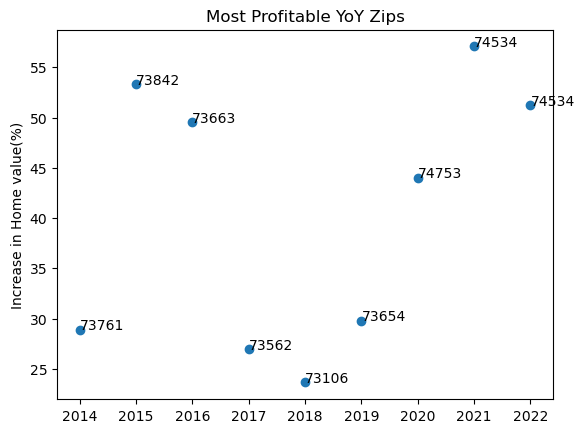

In [43]:

plt.scatter(max_returns_per_year['year'],max_returns_per_year['return'],marker='o',linestyle='-')

plt.title('Most Profitable YoY Zips')
plt.ylabel('Increase in Home value(%)')

for index, row in max_returns_per_year.iterrows():
    plt.annotate(row['zip'], (row['year'], row['return']))

plt.show()
    

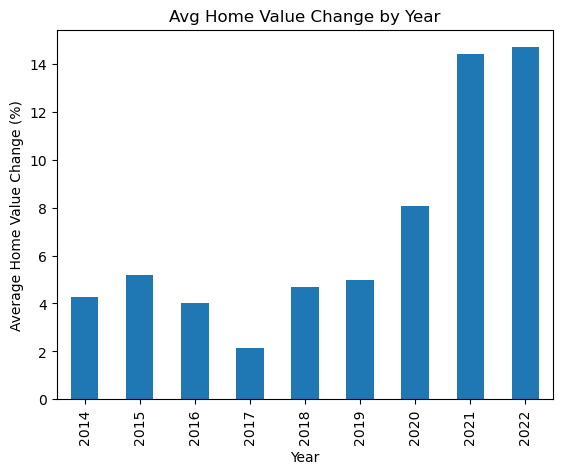

In [44]:
# Average change for Oklahoma by year
home_value_diff_by_zip.mean().plot(kind='bar',title='Avg Home Value Change by Year')
plt.xlabel('Year')
plt.ylabel('Average Home Value Change (%)')
plt.show()